In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#### Loading All Datasets

In [42]:
prising_df=pd.read_csv('Pricing_Data.csv')
competitor_df=pd.read_csv('Competitor_Data.csv')
sales_df=pd.read_csv('Historical_Sales.csv')
returns_df=pd.read_csv('Returns_Data.csv')
pricing_df=pd.read_csv('Pricing_Data.csv')
ads_df=pd.read_csv('Ads_Performance.csv')
inventory_df=pd.read_csv('Inventory_Health.csv')

In [43]:
print(f" Pricing Data: {pricing_df.shape[0]} SKUs, {pricing_df.shape[1]} columns")
print(f" Competitor Data: {competitor_df.shape[0]} SKUs, {competitor_df.shape[1]} columns")
print(f" Sales Data: {sales_df.shape[0]} records, {sales_df.shape[1]} columns")
print(f" Inventory Data: {inventory_df.shape[0]} SKUs, {inventory_df.shape[1]} columns")
print(f" Ads Performance: {ads_df.shape[0]} records, {ads_df.shape[1]} columns")
print(f" Ads Performance: {returns_df.shape[0]} records, {returns_df.shape[1]} columns")
print("\n✓ All datasets loaded successfully!")

 Pricing Data: 50 SKUs, 11 columns
 Competitor Data: 50 SKUs, 5 columns
 Sales Data: 4243 records, 7 columns
 Inventory Data: 50 SKUs, 28 columns
 Ads Performance: 12777 records, 25 columns
 Ads Performance: 50 records, 5 columns

✓ All datasets loaded successfully!


In [44]:
pricing_df.head()

,SKU,Product_description,Product Role,Country_of_Origin,FBA Fee,Storage Fee,Handling_Cost,Cost,Current_Price,Minimum_Acceptable_Margin_%,Target_Gross_Margin_%
0,MN-01,Rectangle Tray -14 x 10 Inch - Pk of 25,Core,India,$15.11,$0.44,$0.75,$16.00,$38.90,20%,35%
1,MN-02,Rectangle Tray -12x10 - Pk of 25,Core,India,$13.55,$0.30,$0.75,$12.00,$33.90,20%,35%
2,MN-03,Oval Tray -15x10 Inch - Pk of 25,Core,India,$13.94,$0.34,$0.75,$15.00,$34.90,20%,35%
3,MN-04,Oval Tray - 13x9 Inch - pk of 25,Core,India,$12.89,$0.30,$0.75,$12.00,$29.90,20%,35%
4,MN-05,Christmas Tray - 17x12 Inch - Pk of 5,Seasonal,India,$11.80,$0.22,$0.75,$13.00,$21.90,25%,45%


In [49]:
prising_df.isna().sum()

SKU                            0
Product_description            0
Product Role                   0
Country_of_Origin              0
FBA Fee                        0
Storage Fee                    0
Handling_Cost                  1
Cost                           0
Current_Price                  0
Minimum_Acceptable_Margin_%    0
Target_Gross_Margin_%          0
dtype: int64

In [ ]:
#Filling the null value (all value of Handling_Cost column is same)
pricing_df[pricing_df['Handling_Cost'].isna()]['Handling_Cost']='$0.75'

#### DATA CLEANING AND PREPROCESSING

In [51]:
# Clean pricing data
pricing_df['FBA Fee'] = pricing_df['FBA Fee'].str.replace('$', '').astype(float)
pricing_df['Storage Fee'] = pricing_df['Storage Fee'].str.replace('$', '').astype(float)
pricing_df['Handling_Cost'] = pricing_df['Handling_Cost'].str.replace('$', '').astype(float)
pricing_df['Cost'] = pricing_df['Cost'].str.replace('$', '').astype(float)
pricing_df['Current_Price'] = pricing_df['Current_Price'].str.replace('$', '').astype(float)
pricing_df['Minimum_Acceptable_Margin_%'] = pricing_df['Minimum_Acceptable_Margin_%'].str.replace('%', '').astype(float)
pricing_df['Target_Gross_Margin_%'] = pricing_df['Target_Gross_Margin_%'].str.replace('%', '').astype(float)

In [52]:
# Calculate total cost
pricing_df['Total_Cost'] = (pricing_df['Cost'] + pricing_df['FBA Fee'] + 
                            pricing_df['Storage Fee'] + pricing_df['Handling_Cost'])

In [59]:
competitor_df['Avg_Competitor_Price']

0     36.9
1     32.5
2     35.2
3     28.4
4     23.9
5     15.8
6     33.5
7     31.2
8     15.6
9     20.5
10    17.8
11    21.4
12    24.2
13    27.8
14    22.4
15    20.1
16    31.5
17    28.8
18    38.9
19    12.5
20    23.1
21    21.9
22    10.5
23    20.8
24    35.5
25    30.4
26    29.9
27    26.2
28    22.8
29    36.4
30    29.8
31    27.5
32     NaN
33    33.8
34    32.9
35    30.1
36    29.4
37    31.2
38    25.8
39    24.9
40    82.5
41    76.8
42    14.8
43     0.0
44    31.4
45    28.9
46    80.4
47    88.2
48    33.1
49    30.2
Name: Avg_Competitor_Price, dtype: float64

In [98]:
competitor_df[competitor_df['Avg_Competitor_Price'].isna()]['Avg_Competitor_Price']=competitor_df['Avg_Competitor_Price'].mean()

In [62]:
# Clean competitor data
competitor_df['Avg_Competitor_Price'] = pd.to_numeric(competitor_df['Avg_Competitor_Price'].astype(str).str.replace('$', ''), errors='coerce')
competitor_df['Lowest_Competitor_Price'] = pd.to_numeric(competitor_df['Lowest_Competitor_Price'].astype(str).str.replace('$', ''), errors='coerce')
competitor_df['Highest_Competitor_Price'] = pd.to_numeric(competitor_df['Highest_Competitor_Price'].astype(str).str.replace('$', ''), errors='coerce')

In [64]:
sales_df['Date']

0       2025-09-01
1       2025-09-01
2       2025-09-01
3       2025-09-01
4       2025-09-01
           ...    
4238    2025-11-30
4239    2025-11-30
4240    2025-11-30
4241    2025-11-30
4242    2025-11-30
Name: Date, Length: 4243, dtype: object

Mane Issue of sales_df is the Date columns contain different type of date format

In [99]:
from datetime import datetime

# Load the data
print("\nFirst few rows:")
print(sales_df.head())
print("\nData types:")
print(sales_df.dtypes)
print("\nMissing values:")
print(sales_df.isnull().sum())
print("\nBasic statistics:")
print(sales_df.describe())

# Check current date format
print(f"Sample dates before conversion: {sales_df['Date'].head(3).tolist()}")

# Convert to datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')

# Check for any dates that failed to convert
invalid_dates = sales_df[sales_df['Date'].isna()]
if len(invalid_dates) > 0:
    print(f" Warning: {len(invalid_dates)} dates failed to convert")
    print(invalid_dates['Date'].head())
else:
    print("✓ All dates converted successfully")

print(f"Date range: {sales_df['Date'].min()} to {sales_df['Date'].max()}")

# ============================================================================
# CLEANING STEP 2: Handle Missing Values
# ============================================================================
print("\n" + "="*80)
print("STEP 2: Handling Missing Values")
print("="*80)

# Show missing values
missing_summary = sales_df.isnull().sum()
print("\nMissing values by column:")
print(missing_summary[missing_summary > 0])

# Fill numeric columns with 0 (assuming missing = no activity)
numeric_columns = ['Sessions - Total', 'Page Views - Total', 'Units Ordered', 
                   'Ordered Product Sales', 'Total Order Items']

for col in numeric_columns:
    before_count = sales_df[col].isnull().sum()
    sales_df[col] = sales_df[col].fillna(0)
    if before_count > 0:
        print(f"✓ Filled {before_count} missing values in '{col}' with 0")

# ============================================================================
# CLEANING STEP 3: Remove Duplicates
# ============================================================================
print("\n" + "="*80)
print("STEP 3: Checking for Duplicates")
print("="*80)

duplicates = sales_df.duplicated(subset=['Date', 'SKU'])
if duplicates.sum() > 0:
    print(f"⚠️  Found {duplicates.sum()} duplicate records")
    print("\nDuplicate examples:")
    print(sales_df[duplicates].head())
    
    # Keep first occurrence, remove duplicates
    sales_df = sales_df.drop_duplicates(subset=['Date', 'SKU'], keep='first')
    print(f"✓ Removed duplicates. New row count: {len(sales_df)}")
else:
    print("✓ No duplicates found")

# ============================================================================
# CLEANING STEP 4: Handle Negative Values
# ============================================================================
print("\n" + "="*80)
print("STEP 4: Checking for Negative Values")
print("="*80)

for col in numeric_columns:
    negative_count = (sales_df[col] < 0).sum()
    if negative_count > 0:
        print(f"⚠️  Found {negative_count} negative values in '{col}'")
        # Replace negative values with 0
        sales_df[col] = sales_df[col].clip(lower=0)
        print(f"✓ Replaced with 0")
    else:
        print(f"✓ No negative values in '{col}'")

# ============================================================================
# CLEANING STEP 5: Handle Outliers
# ============================================================================
print("\n" + "="*80)
print("STEP 5: Checking for Outliers")
print("="*80)

for col in numeric_columns:
    Q1 = sales_df[col].quantile(0.25)
    Q3 = sales_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR  # Using 3*IQR for outliers
    upper_bound = Q3 + 3 * IQR
    
    outliers = ((sales_df[col] < lower_bound) | (sales_df[col] > upper_bound)).sum()
    if outliers > 0:
        print(f"{col}:")
        print(f"  • Outliers: {outliers} ({outliers/len(sales_df)*100:.1f}%)")
        print(f"  • Range: {sales_df[col].min():.2f} to {sales_df[col].max():.2f}")
        print(f"  • Mean: {sales_df[col].mean():.2f}, Median: {sales_df[col].median():.2f}")

# ============================================================================
# CLEANING STEP 6: Validate Data Consistency
# ============================================================================
print("\n" + "="*80)
print("STEP 6: Validating Data Consistency")
print("="*80)

# Check if Units Ordered and Total Order Items are consistent
inconsistent = sales_df[
    (sales_df['Units Ordered'] > 0) & 
    (sales_df['Total Order Items'] == 0)
]
if len(inconsistent) > 0:
    print(f"⚠️  Warning: {len(inconsistent)} rows have Units Ordered but no Order Items")
    # Sync Total Order Items with Units Ordered where missing
    sales_df.loc[
        (sales_df['Units Ordered'] > 0) & (sales_df['Total Order Items'] == 0),
        'Total Order Items'
    ] = sales_df['Units Ordered']
    print("✓ Fixed by syncing with Units Ordered")

# Check if there are sales without units
sales_no_units = sales_df[
    (sales_df['Ordered Product Sales'] > 0) & 
    (sales_df['Units Ordered'] == 0)
]
if len(sales_no_units) > 0:
    print(f"Warning: {len(sales_no_units)} rows have sales revenue but no units")
    print("These may be data errors or special cases")

# ============================================================================
# CLEANING STEP 7: Add Derived Columns
# ============================================================================
print("\n" + "="*80)
print("STEP 7: Adding Derived Columns")
print("="*80)

# Average price per unit (where applicable)
sales_df['Avg_Price_Per_Unit'] = np.where(
    sales_df['Units Ordered'] > 0,
    sales_df['Ordered Product Sales'] / sales_df['Units Ordered'],
    0
)
print("✓ Added 'Avg_Price_Per_Unit' column")

# Conversion rate (orders per session)
sales_df['Conversion_Rate'] = np.where(
    sales_df['Sessions - Total'] > 0,
    (sales_df['Units Ordered'] / sales_df['Sessions - Total']) * 100,
    0
)
print("✓ Added 'Conversion_Rate' column")

# Extract date components
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Quarter'] = sales_df['Date'].dt.quarter# 0=Monday, 6=Sunday
sales_df['Week_of_Year'] = sales_df['Date'].dt.isocalendar().week
print("✓ Added date component columns (Year, Month, Quarter, Day_of_Week, Week_of_Year)")

# ============================================================================
# CLEANING STEP 8: Sort and Reset Index
# ============================================================================

# Sort by Date and SKU
sales_df = sales_df.sort_values(['Date', 'SKU']).reset_index(drop=True)
print("✓ Sorted by Date and SKU")
print("✓ Reset index")




First few rows:
        Date    SKU  Sessions - Total  Page Views - Total  Units Ordered  \
0 2025-09-01  MN-01              22.0                32.0            6.0   
1 2025-09-01  MN-02              28.0                33.0            5.0   
2 2025-09-01  MN-03               9.0                12.0            2.0   
3 2025-09-01  MN-07              31.0                41.0            2.0   
4 2025-09-01  MN-09              24.0                32.0            2.0   

   Ordered Product Sales  Total Order Items  Avg_Price_Per_Unit  \
0                 228.10                5.0           38.016667   
1                 158.96                5.0           31.792000   
2                  81.35                2.0           40.675000   
3                  70.11                2.0           35.055000   
4                  32.26                1.0           16.130000   

   Conversion_Rate    Year  Month  Quarter  Day_of_Week  Week_of_Year  
0        27.272727  2025.0    9.0      3.0         

In [67]:
# Clean returns data
returns_df.columns = returns_df.columns.str.strip()
returns_df['Return_Quantity_90d'] = returns_df['Return Quantity \n(Last 90 days)'].fillna(0).astype(int)

CALCULATING KEY METRICS

In [68]:
sales_summary = sales_df.groupby('SKU').agg({
    'Units Ordered': 'sum',
    'Ordered Product Sales': 'sum',
    'Sessions - Total': 'sum',
    'Page Views - Total': 'sum'
}).reset_index()

sales_summary.columns = ['SKU', 'Total_Units_Sold', 'Total_Revenue', 'Total_Sessions', 'Total_Page_Views']

In [69]:
# Calculate sales velocity (units per day)
date_range = (sales_df['Date'].max() - sales_df['Date'].min()).days
sales_summary['Sales_Velocity'] = sales_summary['Total_Units_Sold'] / date_range

In [70]:
# Calculate conversion rate
sales_summary['Conversion_Rate'] = (sales_summary['Total_Units_Sold'] / 
                                    sales_summary['Total_Sessions'].replace(0, np.nan)) * 100

In [71]:
# Aggregate advertising data by SKU
ads_summary = ads_df.groupby('SKU').agg({
    'impressions': 'sum',
    'clicks': 'sum',
    'spend': 'sum',
    'sales7d': 'sum',
    'unitsSoldClicks7d': 'sum',
    'roasClicks7d': 'mean',
    'acosClicks7d': 'mean'
}).reset_index()

ads_summary.columns = ['SKU', 'Total_Impressions', 'Total_Clicks', 'Total_Ad_Spend', 
                       'Total_Ad_Sales', 'Total_Ad_Units', 'Avg_ROAS', 'Avg_ACOS']


In [72]:
# Merge all data
master_df = pricing_df.merge(competitor_df, on='SKU', how='left')
master_df = master_df.merge(sales_summary, on='SKU', how='left')
master_df = master_df.merge(inventory_df[['SKU', 'days-of-supply', 'sell-through']], on='SKU', how='left')
master_df = master_df.merge(ads_summary, on='SKU', how='left')
master_df = master_df.merge(returns_df[['SKU', 'Return_Quantity_90d']], on='SKU', how='left')


In [73]:
# Calculate return rate
master_df['Return_Rate'] = (master_df['Return_Quantity_90d'] / 
                            master_df['Total_Units_Sold'].replace(0, np.nan)) * 100
master_df['Return_Rate'] = master_df['Return_Rate'].fillna(5.9)

In [74]:
# Calculate current margin
master_df['Current_Margin_%'] = ((master_df['Current_Price'] - master_df['Total_Cost']) / 
                                  master_df['Current_Price']) * 100

In [75]:
# Calculate net margin after returns
master_df['Net_Margin_%'] = master_df['Current_Margin_%'] - master_df['Return_Rate']

In [76]:
master_df = master_df.fillna(0)

print(f"\nMaster dataset created with {len(master_df)} SKUs")
print(f"   Total columns: {len(master_df.columns)}")


Master dataset created with 50 SKUs
   Total columns: 35


ANALYSIS

In [77]:
# Current state metrics
total_revenue = master_df['Total_Revenue'].sum()
total_units = master_df['Total_Units_Sold'].sum()
avg_price = master_df['Current_Price'].mean()
avg_margin = master_df['Current_Margin_%'].mean()
avg_net_margin = master_df['Net_Margin_%'].mean()
avg_roas = master_df['Avg_ROAS'].mean()
avg_return_rate = master_df['Return_Rate'].mean()
total_ad_spend = master_df['Total_Ad_Spend'].sum()


In [78]:
print(f"""
CURRENT STATE SUMMARY
{'─' * 60}
Total Revenue:              ${total_revenue:,.2f}
Total Units Sold:           {total_units:,.0f}
Average Current Price:      ${avg_price:.2f}
Average Gross Margin:       {avg_margin:.2f}%
Average Return Rate:        {avg_return_rate:.2f}%
Average Net Margin:         {avg_net_margin:.2f}%
Total Ad Spend:             ${total_ad_spend:,.2f}
Average ROAS:               {avg_roas:.2f}x
""")


CURRENT STATE SUMMARY
────────────────────────────────────────────────────────────
Total Revenue:              $1,329,749.69
Total Units Sold:           39,863
Average Current Price:      $30.10
Average Gross Margin:       11.87%
Average Return Rate:        6.57%
Average Net Margin:         5.38%
Total Ad Spend:             $172,896.47
Average ROAS:               6.30x



In [79]:
# Margin distribution
below_target = len(master_df[master_df['Current_Margin_%'] < master_df['Target_Gross_Margin_%']])
print(f"SKUs Below Target Margin:   {below_target} out of {len(master_df)} ({below_target/len(master_df)*100:.1f}%)")

SKUs Below Target Margin:   50 out of 50 (100.0%)


In [80]:
# Competitive positioning
below_market = len(master_df[master_df['Current_Price'] < master_df['Avg_Competitor_Price']])
print(f"SKUs Below Market Price:    {below_market} out of {len(master_df)} ({below_market/len(master_df)*100:.1f}%)")

SKUs Below Market Price:    43 out of 50 (86.0%)


In [81]:
# High return SKUs
high_return = len(master_df[master_df['Return_Rate'] > 7])
print(f"High-Return SKUs (>7%):     {high_return} SKUs")

High-Return SKUs (>7%):     17 SKUs


In [82]:
# Low return SKUs
low_return = len(master_df[master_df['Return_Rate'] < 2])
print(f"Low-Return SKUs (<2%):      {low_return} SKUs")

Low-Return SKUs (<2%):      2 SKUs


In [83]:
# Excess inventory
excess_inventory = len(master_df[master_df['days-of-supply'] > 60])
print(f"Excess Inventory (>60d):    {excess_inventory} SKUs ({excess_inventory/len(master_df)*100:.1f}%)")

Excess Inventory (>60d):    38 SKUs (76.0%)


FIVE-FACTOR PRICING ALGORITHM

In [84]:
def calculate_recommended_price(row):
    """
    Five-Factor Dynamic Pricing Algorithm
    """
    # Step 1: Calculate Base Price
    target_margin = row['Target_Gross_Margin_%'] / 100
    base_price = row['Total_Cost'] / (1 - target_margin)
    
    # Step 2: Factor 1 - Competitive Positioning (-5% to +10%)
    if pd.notna(row['Avg_Competitor_Price']) and row['Avg_Competitor_Price'] > 0:
        price_ratio = row['Current_Price'] / row['Avg_Competitor_Price']
        if price_ratio > 1.15:  # Overpriced
            comp_factor = -0.05
        elif price_ratio > 1.10:  # Slightly high
            comp_factor = -0.03
        elif price_ratio > 0.95:  # At market
            comp_factor = 0.00
        elif price_ratio > 0.90:  # Slightly low
            comp_factor = 0.03
        elif price_ratio > 0.85:  # Underpriced
            comp_factor = 0.05
        else:  # Significantly underpriced
            comp_factor = 0.10
    else:
        comp_factor = 0.00
    
    adjusted_price = base_price * (1 + comp_factor)
    
    # Step 3: Factor 2 - Inventory Health (-8% to +8%)
    days_supply = row['days-of-supply']
    if days_supply > 120:  # Critical excess
        inv_factor = -0.08
    elif days_supply > 90:  # Excess
        inv_factor = -0.05
    elif days_supply > 60:  # High
        inv_factor = 0.00
    elif days_supply > 30:  # Healthy
        inv_factor = 0.00
    elif days_supply > 20:  # Low
        inv_factor = 0.05
    else:  # Critical low
        inv_factor = 0.08
    
    adjusted_price = adjusted_price * (1 + inv_factor)
    
    # Step 4: Factor 3 - Sales Velocity (-7% to +5%)
    velocity = row['Sales_Velocity']
    if velocity < 0.3:  # Very low
        vel_factor = -0.07
    elif velocity < 0.5:  # Low
        vel_factor = -0.04
    elif velocity < 3.0:  # Moderate
        vel_factor = 0.00
    elif velocity < 5.0:  # Strong
        vel_factor = 0.03
    else:  # High
        vel_factor = 0.05
    
    adjusted_price = adjusted_price * (1 + vel_factor)
    
    # Step 5: Factor 4 - Advertising Efficiency (-3% to +5%)
    acos = row['Avg_ACOS']
    if acos > 60:  # Very high ACOS
        acos_factor = 0.05
    elif acos > 50:  # High ACOS
        acos_factor = 0.03
    elif acos > 30:  # Moderate
        acos_factor = 0.00
    elif acos > 20:  # Efficient
        acos_factor = -0.02
    else:  # Very efficient
        acos_factor = -0.03
    
    adjusted_price = adjusted_price * (1 + acos_factor)
    
    # Step 6: Factor 5 - Returns Impact (-3% to +10%) [NEW]
    return_rate = row['Return_Rate']
    if return_rate > 10:  # Very high returns
        return_factor = 0.10
    elif return_rate > 7:  # High returns
        return_factor = 0.07
    elif return_rate > 4:  # Moderate returns
        return_factor = 0.03
    elif return_rate > 2:  # Low returns
        return_factor = 0.00
    else:  # Very low returns
        return_factor = -0.03
    
    adjusted_price = adjusted_price * (1 + return_factor)
    
    # Step 7: Apply maximum change limit (15%)
    max_price = row['Current_Price'] * 1.15
    min_price = row['Current_Price'] * 0.85
    recommended_price = np.clip(adjusted_price, min_price, max_price)
    
    # Step 8: Validate minimum margin
    min_margin = row['Minimum_Acceptable_Margin_%'] / 100
    min_acceptable_price = row['Total_Cost'] / (1 - min_margin)
    recommended_price = max(recommended_price, min_acceptable_price)
    
    # Store factors for analysis
    factors = {
        'base_price': base_price,
        'comp_factor': comp_factor,
        'inv_factor': inv_factor,
        'vel_factor': vel_factor,
        'acos_factor': acos_factor,
        'return_factor': return_factor,
        'recommended_price': recommended_price
    }
    
    return factors

In [ ]:
# Apply pricing algorithm
print("\nCalculating recommended prices for all SKUs...")

pricing_results = master_df.apply(calculate_recommended_price, axis=1, result_type='expand')
master_df = pd.concat([master_df, pricing_results], axis=1)

# Calculate new metrics
master_df['Price_Change_$'] = master_df['recommended_price'] - master_df['Current_Price']
master_df['Price_Change_%'] = (master_df['Price_Change_$'] / master_df['Current_Price']) * 100

master_df['New_Margin_%'] = ((master_df['recommended_price'] - master_df['Total_Cost']) / 
                              master_df['recommended_price']) * 100
master_df['New_Net_Margin_%'] = master_df['New_Margin_%'] - master_df['Return_Rate']

master_df['Margin_Improvement'] = master_df['New_Margin_%'] - master_df['Current_Margin_%']



⚙️  Calculating recommended prices for all SKUs...


In [100]:
# Assign priority
def assign_priority(row):
    if row['Return_Rate'] > 7 or row['Avg_ROAS'] > 5:
        return 'HIGH'
    elif row['Current_Margin_%'] < 15:
        return 'HIGH'
    else:
        return 'MEDIUM'

master_df['Priority'] = master_df.apply(assign_priority, axis=1)

print("Pricing calculations completed!")

Pricing calculations completed!


PRICING RECOMMENDATIONS SUMMARY

In [87]:
# impact
avg_current = master_df['Current_Price'].mean()
avg_recommended = master_df['recommended_price'].mean()
avg_change = master_df['Price_Change_%'].mean()

new_avg_margin = master_df['New_Margin_%'].mean()
new_avg_net_margin = master_df['New_Net_Margin_%'].mean()
margin_improvement = master_df['Margin_Improvement'].mean()

print(f"""
PORTFOLIO-WIDE IMPACT
{'─' * 60}
Current Avg Price:          ${avg_current:.2f}
Recommended Avg Price:      ${avg_recommended:.2f}
Average Price Change:       ${avg_recommended - avg_current:.2f} ({avg_change:.1f}%)

Current Gross Margin:       {avg_margin:.2f}%
New Gross Margin:           {new_avg_margin:.2f}%
Margin Improvement:         {margin_improvement:.2f} pp

Current Net Margin:         {avg_net_margin:.2f}%
New Net Margin:             {new_avg_net_margin:.2f}%
Net Margin Improvement:     {new_avg_net_margin - avg_net_margin:.2f} pp
""")



PORTFOLIO-WIDE IMPACT
────────────────────────────────────────────────────────────
Current Avg Price:          $30.10
Recommended Avg Price:      $34.88
Average Price Change:       $4.77 (16.7%)

Current Gross Margin:       11.87%
New Gross Margin:           26.68%
Margin Improvement:         14.81 pp

Current Net Margin:         5.38%
New Net Margin:             20.10%
Net Margin Improvement:     14.72 pp



In [88]:
# Financial projections (assuming 10 units/SKU/month conservative estimate)
monthly_units_per_sku = 10
total_skus = len(master_df)

current_monthly_revenue = avg_current * monthly_units_per_sku * total_skus
recommended_monthly_revenue = avg_recommended * monthly_units_per_sku * total_skus

current_monthly_profit = current_monthly_revenue * (avg_margin / 100)
recommended_monthly_profit = recommended_monthly_revenue * (new_avg_margin / 100)

current_net_profit = current_monthly_profit - (current_monthly_revenue * (avg_return_rate / 100))
recommended_net_profit = recommended_monthly_profit - (recommended_monthly_revenue * (avg_return_rate / 100))

print(f"""
FINANCIAL PROJECTIONS (Conservative: 10 units/SKU/month)
{'─' * 60}
Current Monthly Revenue:    ${current_monthly_revenue:,.2f}
Recommended Monthly Rev:    ${recommended_monthly_revenue:,.2f}
Revenue Increase:           ${recommended_monthly_revenue - current_monthly_revenue:,.2f}

Current Monthly Profit:     ${current_net_profit:,.2f}
Recommended Monthly Profit: ${recommended_net_profit:,.2f}
Profit Increase:            ${recommended_net_profit - current_net_profit:,.2f}

ANNUAL IMPACT
{'─' * 60}
Annual Revenue Increase:    ${(recommended_monthly_revenue - current_monthly_revenue) * 12:,.2f}
Annual Profit Increase:     ${(recommended_net_profit - current_net_profit) * 12:,.2f}
Profit Improvement:         {((recommended_net_profit - current_net_profit) / current_net_profit * 100):.1f}%
""")


FINANCIAL PROJECTIONS (Conservative: 10 units/SKU/month)
────────────────────────────────────────────────────────────
Current Monthly Revenue:    $15,051.00
Recommended Monthly Rev:    $17,438.37
Revenue Increase:           $2,387.37

Current Monthly Profit:     $797.25
Recommended Monthly Profit: $3,505.96
Profit Increase:            $2,708.71

ANNUAL IMPACT
────────────────────────────────────────────────────────────
Annual Revenue Increase:    $28,648.44
Annual Profit Increase:     $32,504.53
Profit Improvement:         339.8%



In [89]:
# Returns impact analysis
high_return_count = len(master_df[master_df['Return_Rate'] > 7])
low_return_count = len(master_df[master_df['Return_Rate'] < 2])

print(f"""
RETURNS IMPACT ANALYSIS
{'─' * 60}
High-Return SKUs (>7%):     {high_return_count} SKUs
Avg Return Factor:          +{master_df[master_df['Return_Rate'] > 7]['return_factor'].mean() * 100:.1f}%

Low-Return SKUs (<2%):      {low_return_count} SKUs
Avg Return Factor:          {master_df[master_df['Return_Rate'] < 2]['return_factor'].mean() * 100:.1f}%

Portfolio Return Rate:      {avg_return_rate:.2f}%
Margin Erosion from Returns: {avg_return_rate:.2f} pp
""")



RETURNS IMPACT ANALYSIS
────────────────────────────────────────────────────────────
High-Return SKUs (>7%):     17 SKUs
Avg Return Factor:          +8.2%

Low-Return SKUs (<2%):      2 SKUs
Avg Return Factor:          -3.0%

Portfolio Return Rate:      6.57%
Margin Erosion from Returns: 6.57 pp



### DETAILED RECOMMENDATIONS TABLE

##### TOP 20 PRICING RECOMMENDATIONS (by Revenue Impact)

In [93]:
# Create output dataframe
output_df = master_df[[
    'SKU', 'Product_description', 'Current_Price', 'recommended_price',
    'Price_Change_%', 'Return_Rate', 'return_factor', 'New_Net_Margin_%', 'Priority'
]].copy()

output_df = output_df.sort_values('Price_Change_%', ascending=False)
output_df['return_factor_%'] = output_df['return_factor'] * 100

# Display top 20
print("\n", output_df.head(20).to_string(index=False))



   SKU                    Product_description  Current_Price  recommended_price  Price_Change_%  Return_Rate  return_factor  New_Net_Margin_% Priority  return_factor_%
MN-05  Christmas Tray - 17x12 Inch - Pk of 5          21.90          34.360000       56.894977     1.851852          -0.03         23.148148     HIGH             -3.0
MN-09         6 Inch Heart Plates - pk of 25          14.90          19.893333       33.512304    13.580247           0.10         11.419753     HIGH             10.0
MN-23 2.5 Inch round Bowl - 25 ml - Pk of 25           9.95          13.000000       30.653266    10.091743           0.10          9.908257     HIGH             10.0
MN-18     Round Combo 10 & 7 inch - Pk of 50          26.90          34.662500       28.856877     6.511057           0.03         13.488943     HIGH              3.0
MN-06          Star Tray - 14 Inch - Pk of 5          14.95          19.160000       28.160535     2.419355           0.00         22.580645     HIGH              

#### VISUALIZATIONS

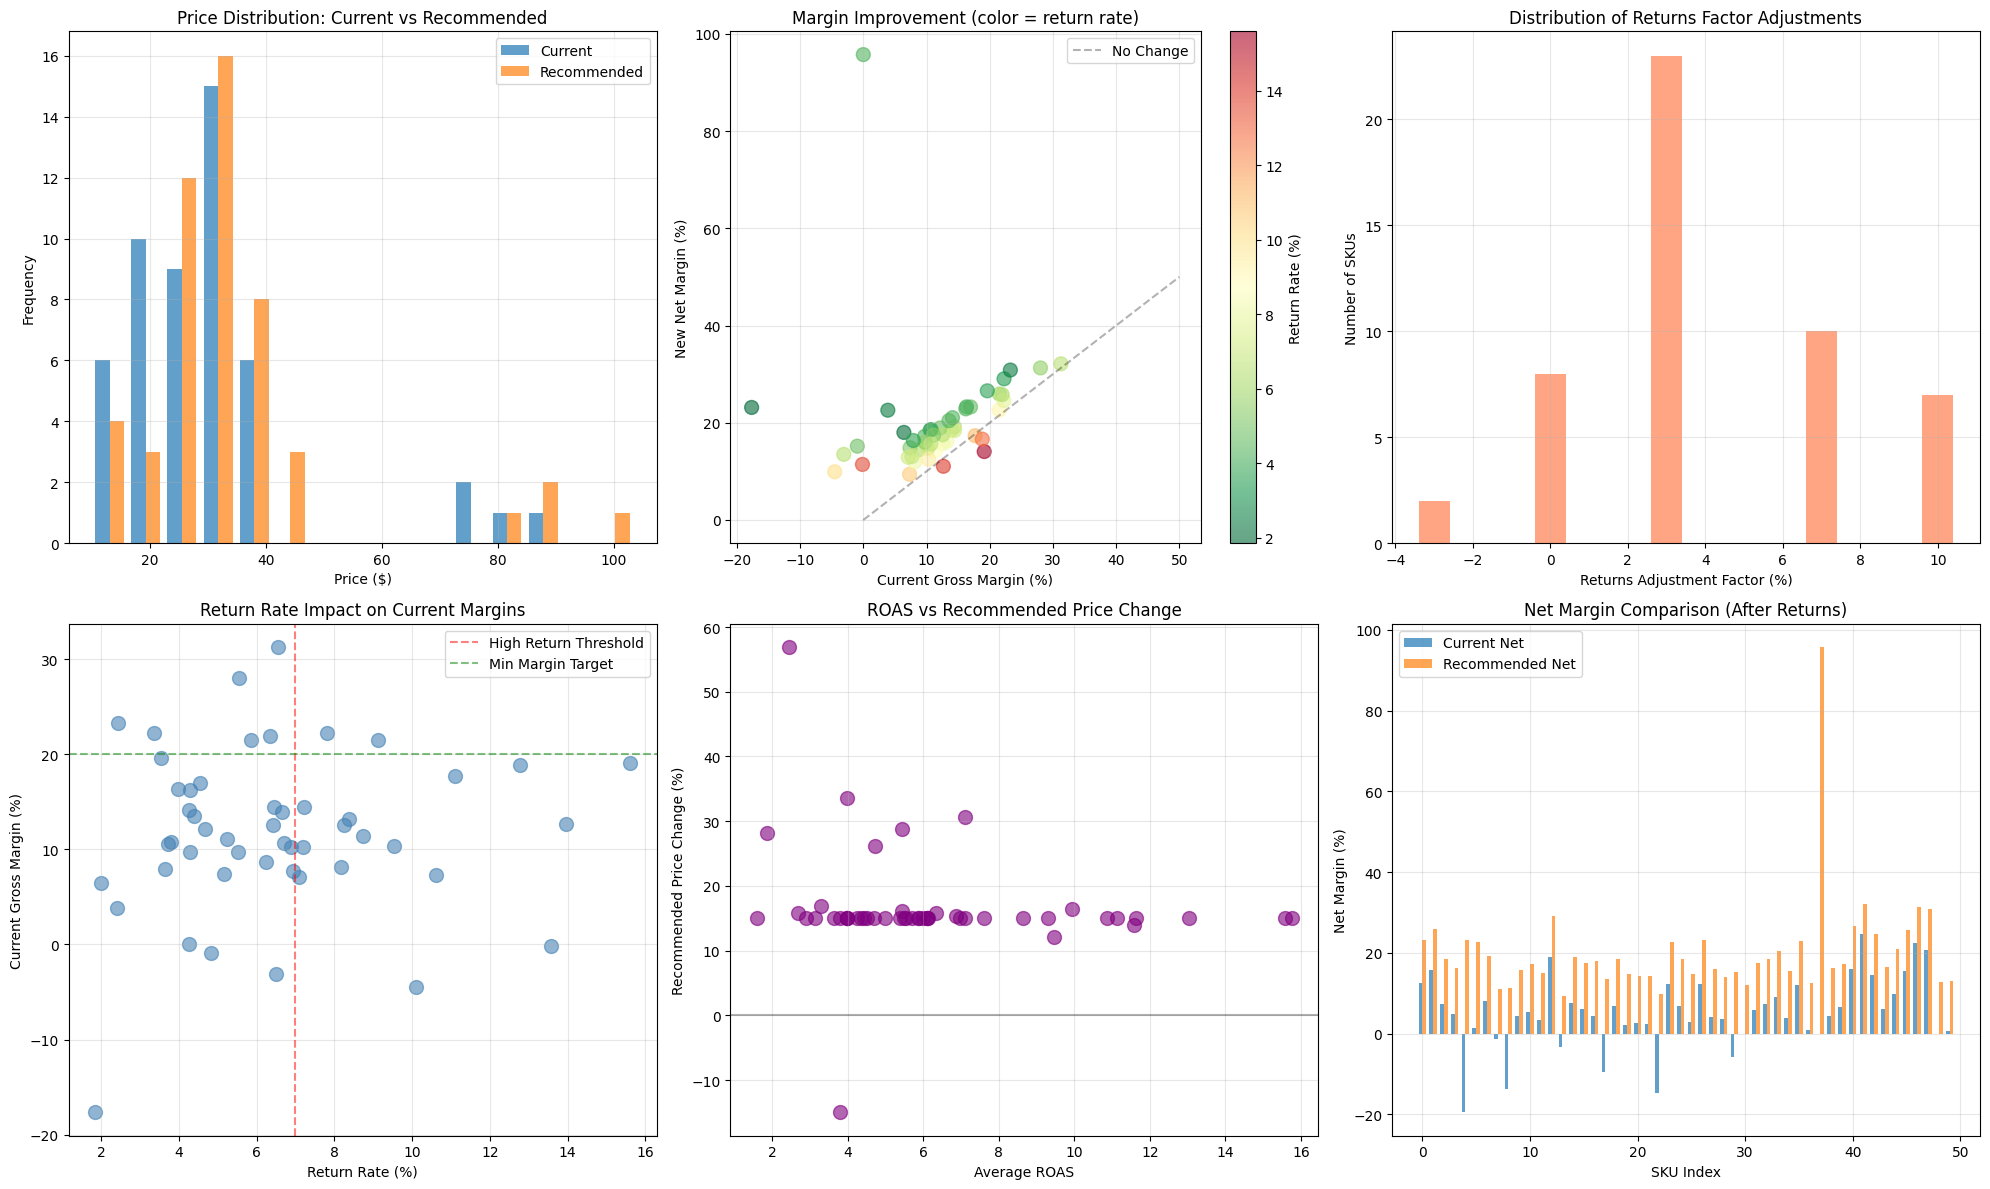

In [97]:
fig = plt.figure(figsize=(20, 12))

# 1. Price Distribution Comparison
ax1 = plt.subplot(2, 3, 1)
plt.hist([master_df['Current_Price'], master_df['recommended_price']], 
         label=['Current', 'Recommended'], bins=15, alpha=0.7)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Price Distribution: Current vs Recommended')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Margin Improvement
ax2 = plt.subplot(2, 3, 2)
plt.scatter(master_df['Current_Margin_%'], master_df['New_Net_Margin_%'], 
           c=master_df['Return_Rate'], cmap='RdYlGn_r', s=100, alpha=0.6)
plt.plot([0, 50], [0, 50], 'k--', alpha=0.3, label='No Change')
plt.xlabel('Current Gross Margin (%)')
plt.ylabel('New Net Margin (%)')
plt.title('Margin Improvement (color = return rate)')
plt.colorbar(label='Return Rate (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Returns Factor Distribution
ax3 = plt.subplot(2, 3, 3)
return_bins = master_df['return_factor'].value_counts().sort_index()
plt.bar(return_bins.index * 100, return_bins.values, color='coral', alpha=0.7)
plt.xlabel('Returns Adjustment Factor (%)')
plt.ylabel('Number of SKUs')
plt.title('Distribution of Returns Factor Adjustments')
plt.grid(True, alpha=0.3)

# 4. Return Rate vs Current Margin
ax4 = plt.subplot(2, 3, 4)
plt.scatter(master_df['Return_Rate'], master_df['Current_Margin_%'], 
           s=100, alpha=0.6, c='steelblue')
plt.xlabel('Return Rate (%)')
plt.ylabel('Current Gross Margin (%)')
plt.title('Return Rate Impact on Current Margins')
plt.axvline(x=7, color='r', linestyle='--', alpha=0.5, label='High Return Threshold')
plt.axhline(y=20, color='g', linestyle='--', alpha=0.5, label='Min Margin Target')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. ROAS vs Price Change
ax5 = plt.subplot(2, 3, 5)
plt.scatter(master_df['Avg_ROAS'], master_df['Price_Change_%'], 
           s=100, alpha=0.6, c='purple')
plt.xlabel('Average ROAS')
plt.ylabel('Recommended Price Change (%)')
plt.title('ROAS vs Recommended Price Change')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

# 6. Net Margin: Current vs Recommended
ax6 = plt.subplot(2, 3, 6)
x = np.arange(len(master_df))
width = 0.35
plt.bar(x - width/2, master_df['Net_Margin_%'], width, label='Current Net', alpha=0.7)
plt.bar(x + width/2, master_df['New_Net_Margin_%'], width, label='Recommended Net', alpha=0.7)
plt.xlabel('SKU Index')
plt.ylabel('Net Margin (%)')
plt.title('Net Margin Comparison (After Returns)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()

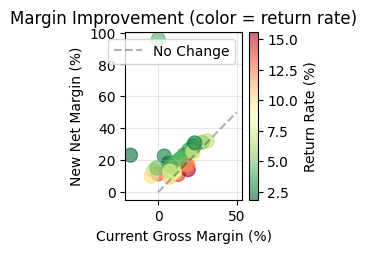

In [ ]:
with pd.ExcelWriter('Pricing_Recommendations_Complete.xlsx', engine='openpyxl') as writer:
    # Sheet 1: Summary
    summary_data = {
        'Metric': [
            'Total SKUs',
            'Average Current Price',
            'Average Recommended Price',
            'Average Price Increase',
            'Current Gross Margin',
            'Recommended Gross Margin',
            'Current Net Margin (after returns)',
            'Recommended Net Margin',
            'Average Return Rate',
            'High-Return SKUs (>7%)',
            'Low-Return SKUs (<2%)',
            'SKUs Below Target Margin',
            'Annual Revenue Increase (Est.)',
            'Annual Profit Increase (Est.)'
        ],
        'Value': [
            len(master_df),
            f'${avg_current:.2f}',
            f'${avg_recommended:.2f}',
            f'{avg_change:.1f}%',
            f'{avg_margin:.2f}%',
            f'{new_avg_margin:.2f}%',
            f'{avg_net_margin:.2f}%',
            f'{new_avg_net_margin:.2f}%',
            f'{avg_return_rate:.2f}%',
            high_return_count,
            low_return_count,
            below_target,
            f'${(recommended_monthly_revenue - current_monthly_revenue) * 12:,.2f}',
            f'${(recommended_net_profit - current_net_profit) * 12:,.2f}'
        ]
    }
    pd.DataFrame(summary_data).to_excel(writer, sheet_name='Summary', index=False)
    
    # Sheet 2: All Recommendations
    final_output.to_excel(writer, sheet_name='All_Recommendations', index=False)
    
    # Sheet 3: High Priority
    high_priority = master_df[master_df['Priority'] == 'HIGH'].copy()
    high_priority = high_priority.sort_values('Price_Change_%', ascending=False)
    high_priority[['SKU', 'Product_description', 'Current_Price', 'recommended_price', 
                   'Price_Change_%', 'Return_Rate', 'New_Net_Margin_%', 'Avg_ROAS']].to_excel(
        writer, sheet_name='High_Priority', index=False)
    
    # Sheet 4: High Returns Analysis
    high_returns = master_df[master_df['Return_Rate'] > 7].copy()
    high_returns = high_returns.sort_values('Return_Rate', ascending=False)
    high_returns[['SKU', 'Product_description', 'Return_Rate', 'Current_Margin_%', 
                  'Net_Margin_%', 'return_factor', 'recommended_price']].to_excel(
        writer, sheet_name='High_Returns', index=False)
    
    